r2_lin: 0.83
rmse_lin: 6.7
r2_poly: 0.83
rmse_poly: 6.66
r2_rbf: 0.69
rmse_rbf: 9.03


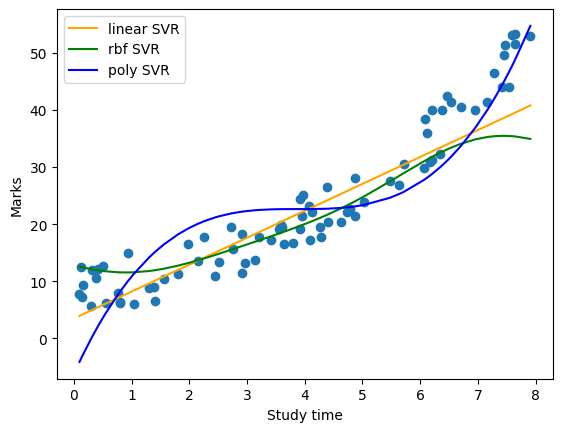

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

df = pd.read_csv('Student_Marks.csv')
df.head()

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf',  gamma='scale')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score_lin = round(metrics.r2_score(y_test, y_test_pred),2)
rmse_lin = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2_lin: {r2_score_lin}')
print(f'rmse_lin: {rmse_lin}')

# Test dataset for polinomial
y_test_pred2 = svr_poly.predict(X_test_scaled)
r2_score_poly = round(metrics.r2_score(y_test, y_test_pred2),2)
rmse_poly = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)),2)
print(f'r2_poly: {r2_score_poly}')
print(f'rmse_poly: {rmse_poly}')

# Test dataset for rbf
y_test_pred3 = svr_rbf.predict(X_test_scaled)
r2_score_rbf = round(metrics.r2_score(y_test, y_test_pred3),2)
rmse_rbf = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)),2)
print(f'r2_rbf: {r2_score_rbf}')
print(f'rmse_rbf: {rmse_rbf}')

# # #### Test dataset - plot ####
# y_test_pred = svr_lin.predict(X_test_scaled)
# min_axis = min(min(y_test_pred), min(y_test))
# max_x = max(max(y_test_pred), max(y_test))
# plt.scatter(y_test_pred2, y_test)
# plt.plot([min_axis,max_x], [min_axis,max_x], 'r--', label = '1:1')
# plt.legend()
# plt.xlabel('Prediction')
# plt.ylabel('Actual')
plt.show()

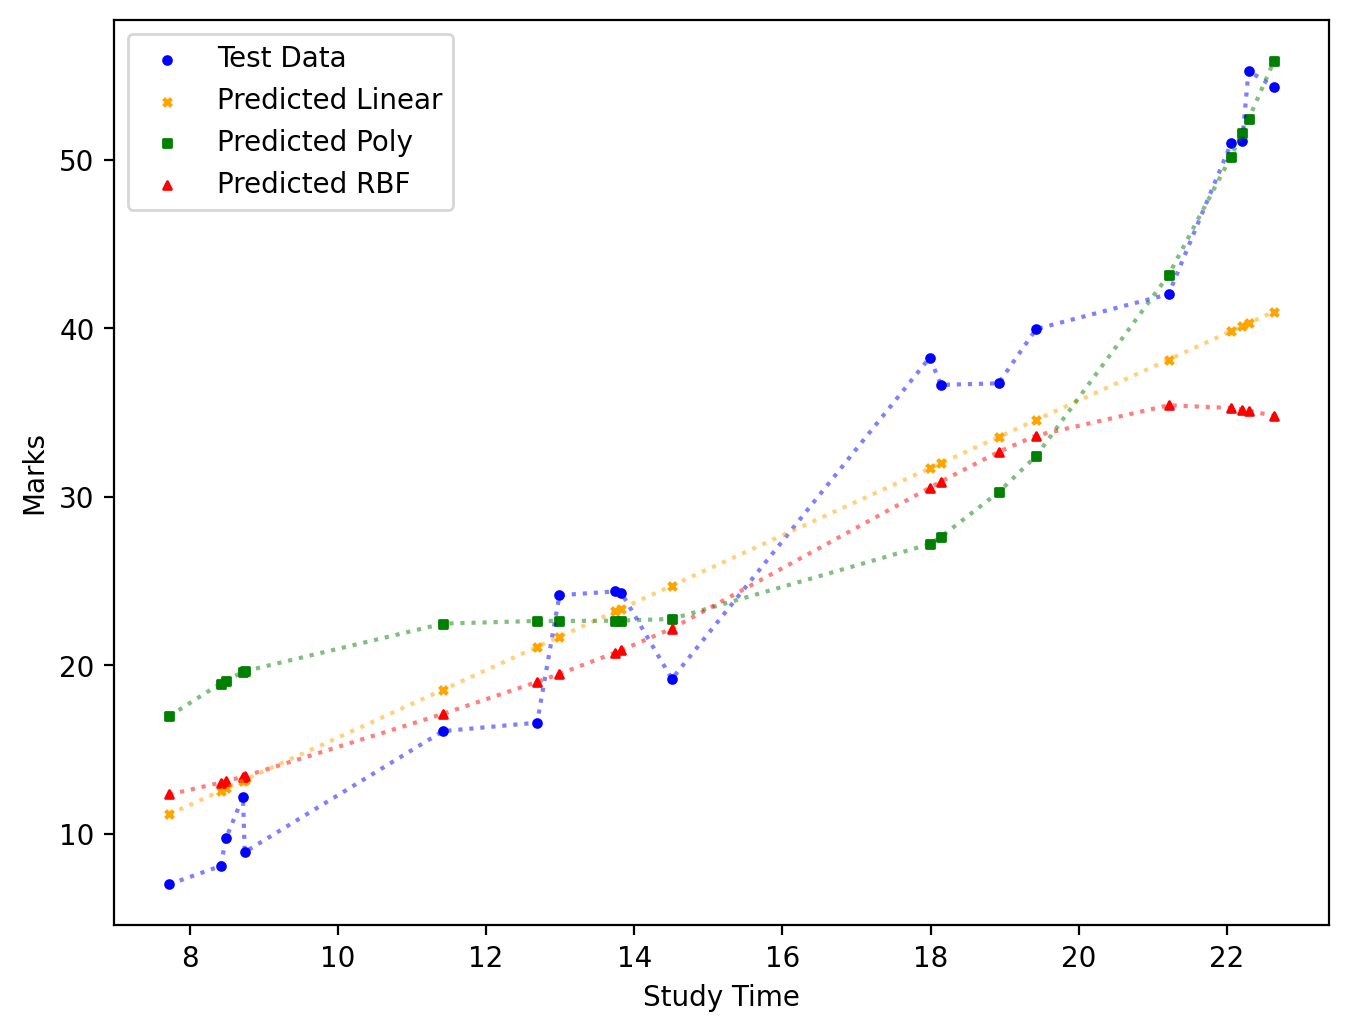

In [46]:
plt.figure(figsize=(784/100, 588/100), dpi=200)
# Create scatter plots with different markers for each prediction
plt.scatter(scaler.inverse_transform(X_test), y_test, color='blue', label='Test Data', s=8, marker='o')          # Circle marker for true values
plt.scatter(scaler.inverse_transform(X_test), y_test_pred, label='Predicted Linear', s=8, marker='x', color='orange')        # Cross marker for Linear
plt.scatter(scaler.inverse_transform(X_test), y_test_pred2, label='Predicted Poly', s=8, marker='s',color='green')         # Square marker for Polynomial
plt.scatter(scaler.inverse_transform(X_test), y_test_pred3, label='Predicted RBF', s=8, marker='^',color='red')          # Triangle marker for RBF

# Add dotted lines connecting the points
plt.plot(scaler.inverse_transform(X_test), y_test, linestyle=':', color='blue', alpha=0.5)              # Dotted line for True values
plt.plot(scaler.inverse_transform(X_test), y_test_pred, linestyle=':', color='orange', alpha=0.5)       # Dotted line for Linear
plt.plot(scaler.inverse_transform(X_test), y_test_pred2, linestyle=':', color='green', alpha=0.5)       # Dotted line for Polynomial
plt.plot(scaler.inverse_transform(X_test), y_test_pred3, linestyle=':', color='red', alpha=0.5)         # Dotted line for RBF

# Add labels and legend
plt.xlabel('Study Time')
plt.ylabel('Marks')
plt.legend()

# Show plot
plt.show()